In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing



In [ ]:
df=pd.read_csv('2212241 Dataset.csv') # Read the CSV file into a DataFrame

In [ ]:
df.info() # Display concise information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   STUDENT ID                                                         145 non-null    object
 1   Student Age                                                        145 non-null    int64 
 2   Sex                                                                145 non-null    int64 
 3   Graduated HighSchool Type                                          145 non-null    int64 
 4   Scholarship type                                                   145 non-null    int64 
 5   Additional Work                                                    145 non-null    int64 
 6   Regular Artistic or Sports activity                                145 non-null    int64 
 7   Have a partner?                    

In [ ]:
df.head()

,STUDENT ID,Student Age,Sex,Graduated HighSchool Type,Scholarship type,Additional Work,Regular Artistic or Sports activity,Have a partner?,Total Salary if available,Transportation to the University,...,Preparation to midterm exams1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),Course ID,Output Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [ ]:
target_distribution = df['Output Grade'].value_counts()
print(target_distribution)


1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: Output Grade, dtype: int64


Dataset is imbalanced as we can see there are different classes with different number of representations. Hence, performing undersampling to make it better.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

X = df.drop(['STUDENT ID', 'Course ID', 'Output Grade'], axis=1)
y = df['Output Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 9 to 102
Data columns (total 30 columns):
 #   Column                                                             Non-Null Count  Dtype
---  ------                                                             --------------  -----
 0   Student Age                                                        116 non-null    int64
 1   Sex                                                                116 non-null    int64
 2   Graduated HighSchool Type                                          116 non-null    int64
 3   Scholarship type                                                   116 non-null    int64
 4   Additional Work                                                    116 non-null    int64
 5   Regular Artistic or Sports activity                                116 non-null    int64
 6   Have a partner?                                                    116 non-null    int64
 7   Total Salary if available                   

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 69 to 111
Data columns (total 30 columns):
 #   Column                                                             Non-Null Count  Dtype
---  ------                                                             --------------  -----
 0   Student Age                                                        29 non-null     int64
 1   Sex                                                                29 non-null     int64
 2   Graduated HighSchool Type                                          29 non-null     int64
 3   Scholarship type                                                   29 non-null     int64
 4   Additional Work                                                    29 non-null     int64
 5   Regular Artistic or Sports activity                                29 non-null     int64
 6   Have a partner?                                                    29 non-null     int64
 7   Total Salary if available                   

In [ ]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 30 columns):
 #   Column                                                             Non-Null Count  Dtype
---  ------                                                             --------------  -----
 0   Student Age                                                        32 non-null     int64
 1   Sex                                                                32 non-null     int64
 2   Graduated HighSchool Type                                          32 non-null     int64
 3   Scholarship type                                                   32 non-null     int64
 4   Additional Work                                                    32 non-null     int64
 5   Regular Artistic or Sports activity                                32 non-null     int64
 6   Have a partner?                                                    32 non-null     int64
 7   Total Salary if available                     

In [ ]:
y_train_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 32 entries, 0 to 31
Series name: Output Grade
Non-Null Count  Dtype
--------------  -----
32 non-null     int64
dtypes: int64(1)
memory usage: 384.0 bytes


In [ ]:
for x in df.columns:
  Num = len(df[x].unique())
  print(f"{x} - {Num}")

STUDENT ID - 145
Student Age - 3
Sex - 2
Graduated HighSchool Type - 3
Scholarship type - 5
Additional Work - 2
Regular Artistic or Sports activity - 2
Have a partner? - 2
Total Salary if available - 5
Transportation to the University - 4
Accommodation type in Cyprus - 4
Mother's education - 6
Father's education - 6
No.Of Sisters/Brothers if available - 5
Parental Status - 3
Mother's occupation - 5
Father's occupation - 5
Weekly study hours - 5
Reading frequency(non-scientific books/journals) - 3
Reading frequency(scientific books/journals) - 3
Atttendance to the seminars related to the department - 2
Impact of your activities on your success - 3
Attendance to classes - 2
Preparation to midterm exams1 - 3
Preparation to midterm exams 2 - 3
Taking notes in classes - 3
Listening in classes - 3
Discussion improves my interest and success in the course - 3
Flip-classroom - 3
Cumulative grade point average in the last semester (/4.00) - 5
Expected Cumulative grade point average in the gradu

#EXPLORATORY DATA ANALYSIS(EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#DISTRIBUTION PLOT

0.39037211618107137

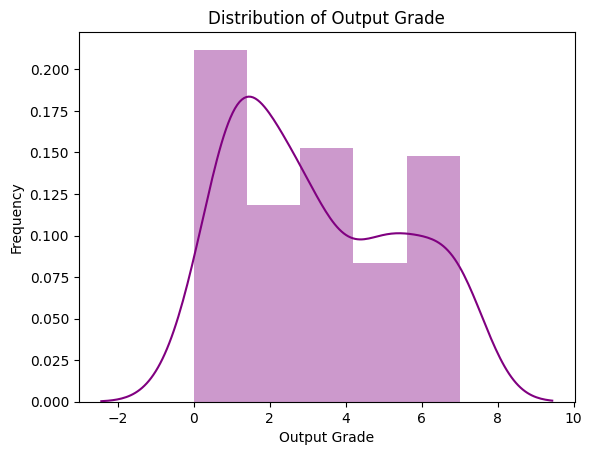

In [ ]:
sns.distplot(df['Output Grade'],color='Purple')
plt.title('Distribution of Output Grade')
plt.ylabel('Frequency')
skewness_values = df['Output Grade'].skew()
skewness_values

0.44348649287174396

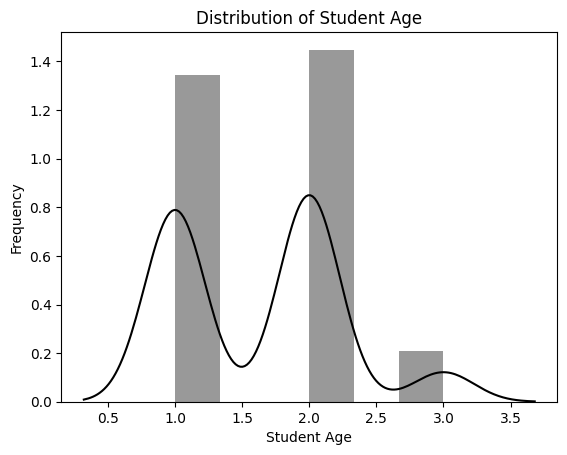

In [ ]:
sns.distplot(df['Student Age'],color='Black')
plt.title('Distribution of Student Age')
plt.ylabel('Frequency')
skewness_values = df['Student Age'].skew()
skewness_values

-0.049821884211556346

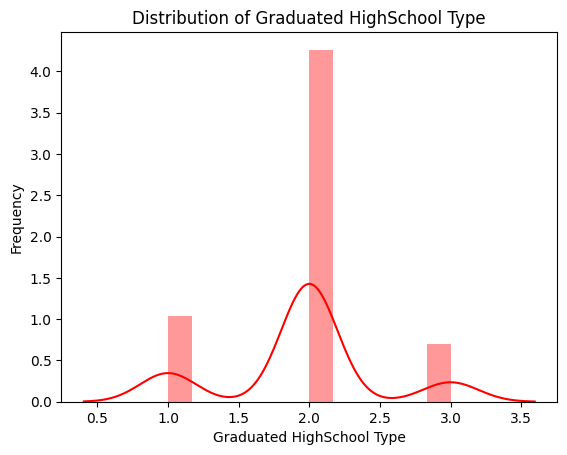

In [ ]:
sns.distplot(df['Graduated HighSchool Type'],color='red')
plt.title('Distribution of Graduated HighSchool Type')
plt.ylabel('Frequency')
skewness_values = df['Graduated HighSchool Type'].skew()
skewness_values

0.36694047581292516

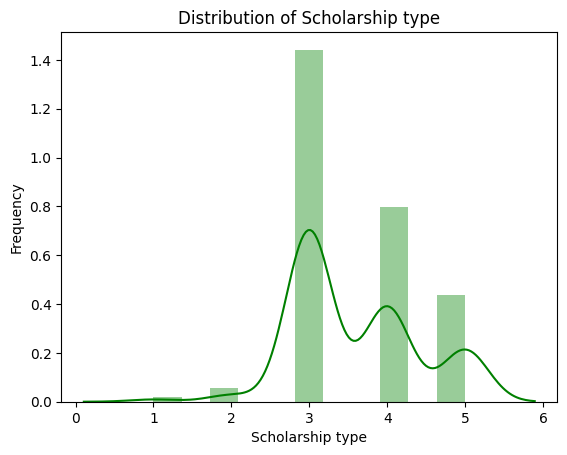

In [ ]:
sns.distplot(df['Scholarship type'],color='green')
plt.title('Distribution of Scholarship type')
plt.ylabel('Frequency')
skewness_values = df['Scholarship type'].skew()
skewness_values

0.6026169169404538

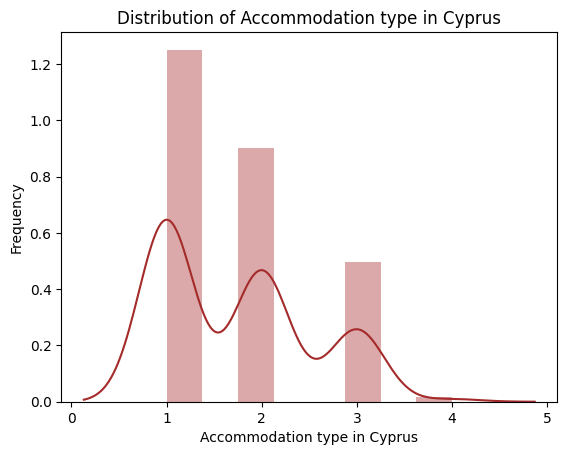

In [ ]:
sns.distplot(df['Accommodation type in Cyprus'],color='brown')
plt.title('Distribution of Accommodation type in Cyprus')
plt.ylabel('Frequency')
skewness_values = df['Accommodation type in Cyprus'].skew()
skewness_values

#BOX PLOTS

1.6206896551724137

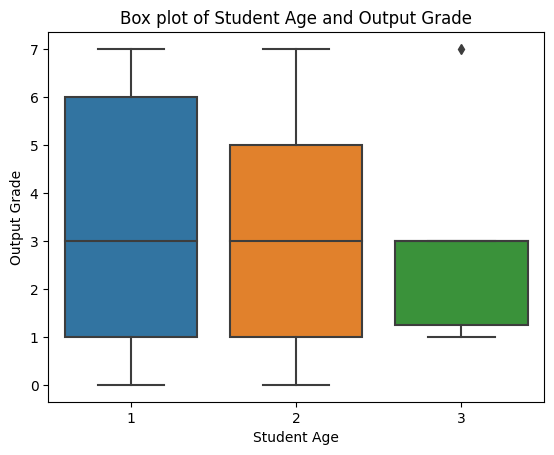

In [ ]:
sns.boxplot(x='Student Age', y='Output Grade', data=df)
plt.title('Box plot of Student Age and Output Grade')
mean_value = df['Student Age'].mean()
mean_value

2.282758620689655

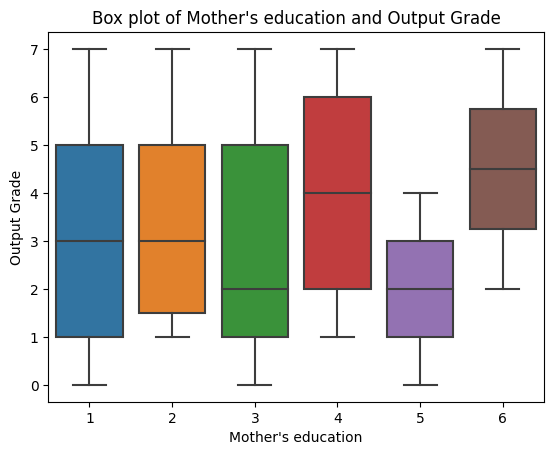

In [ ]:
sns.boxplot(x='Mother\'s education', y='Output Grade', data=df)
plt.title('Box plot of Mother\'s education and Output Grade')
mean_value = df['Mother\'s education'].mean()
mean_value

1.9448275862068964

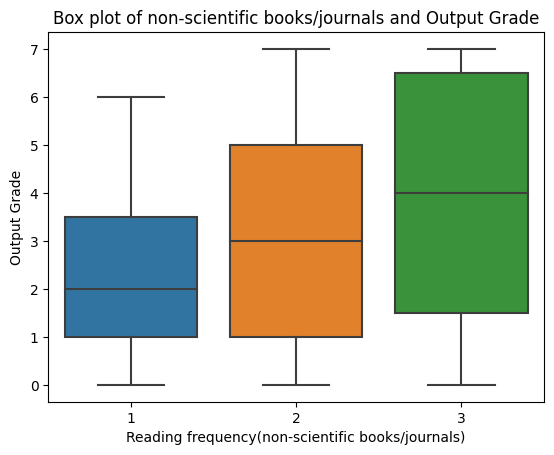

In [ ]:
sns.boxplot(x='Reading frequency(non-scientific books/journals)', y='Output Grade', data=df)
plt.title('Box plot of non-scientific books/journals and Output Grade')
mean_value = df['Reading frequency(non-scientific books/journals)'].mean()
mean_value

1.3379310344827586

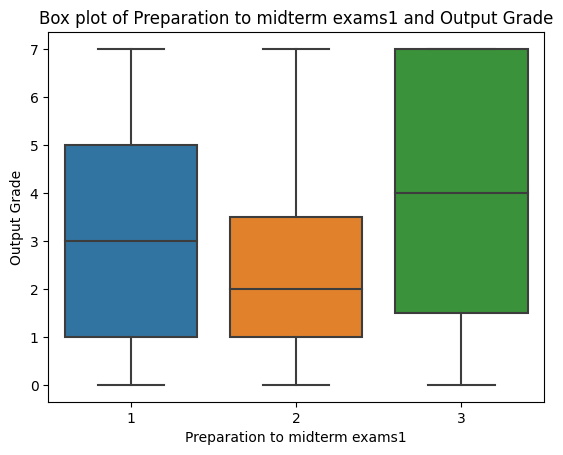

In [ ]:
sns.boxplot(x='Preparation to midterm exams1', y='Output Grade', data=df)
plt.title('Box plot of Preparation to midterm exams1 and Output Grade')
mean_value = df['Preparation to midterm exams1'].mean()
mean_value

4.13103448275862

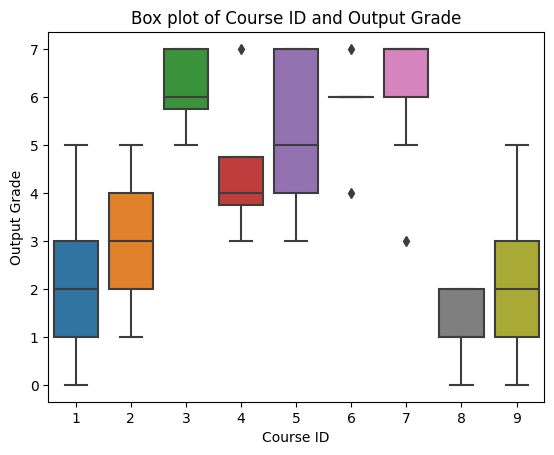

In [ ]:
sns.boxplot(x='Course ID', y='Output Grade', data=df)
plt.title('Box plot of Course ID and Output Grade')
mean_value = df['Course ID'].mean()
mean_value

#SCATTER PLOTS

Text(0.5, 1.0, 'Student Age vs. Output Grade with Scholarship type')

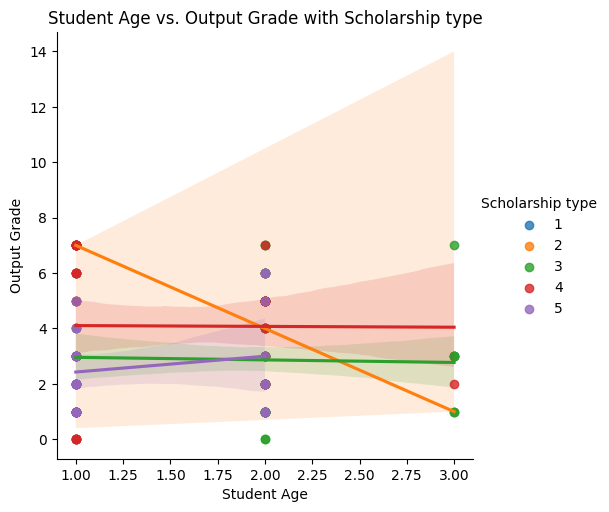

In [ ]:
sns.lmplot(x='Student Age', y='Output Grade', hue='Scholarship type', data=df)
plt.title('Student Age vs. Output Grade with Scholarship type')


Text(0.5, 1.0, 'Additional Work vs. Output Grade with Transportation to the University')

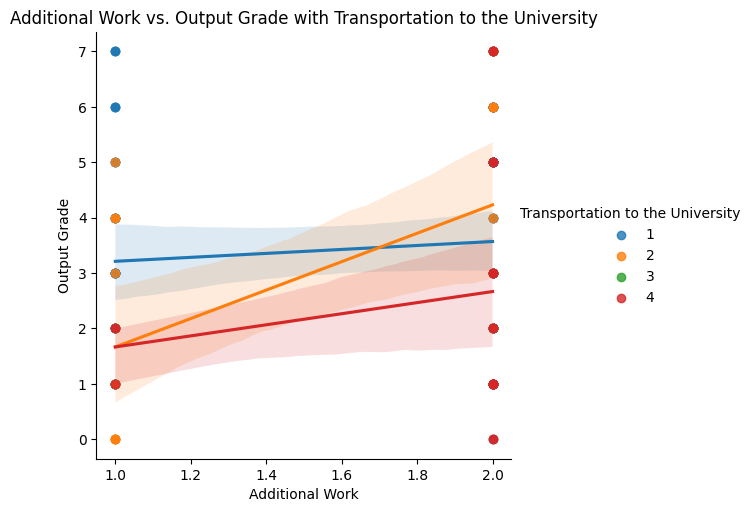

In [ ]:
sns.lmplot(x='Additional Work', y='Output Grade', hue='Transportation to the University', data=df)
plt.title('Additional Work vs. Output Grade with Transportation to the University')

Text(0.5, 1.0, "Mother's education vs. Father's education with Parental Status")

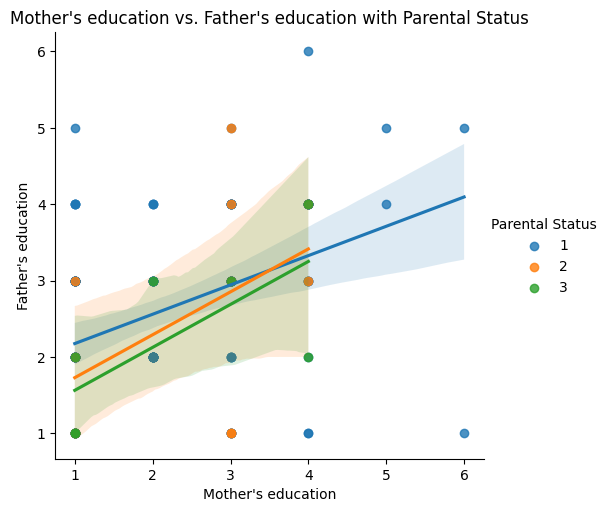

In [ ]:
sns.lmplot(x='Mother\'s education', y='Father\'s education', hue='Parental Status', data=df)
plt.title('Mother\'s education vs. Father\'s education with Parental Status')

Text(0.5, 1.0, 'Weekly study hours vs. Attendance to classes with Output Grade')

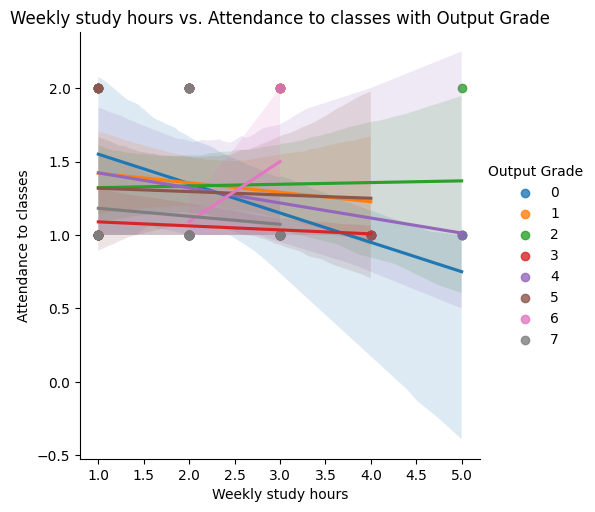

In [ ]:
sns.lmplot(x='Weekly study hours', y='Attendance to classes', hue='Output Grade', data=df)
plt.title('Weekly study hours vs. Attendance to classes with Output Grade')

Text(0.5, 1.0, 'Taking notes in classes vs. Listening in classes with Output Grade')

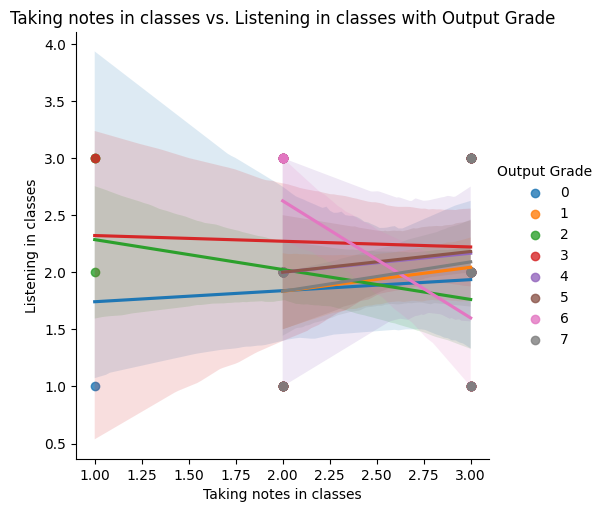

In [ ]:
sns.lmplot(x='Taking notes in classes', y='Listening in classes', hue='Output Grade', data=df)
plt.title('Taking notes in classes vs. Listening in classes with Output Grade')

#VIOLIN PLOTS

Text(0.5, 1.0, 'Violin Plot of Student Age and Sex with Additional Work')

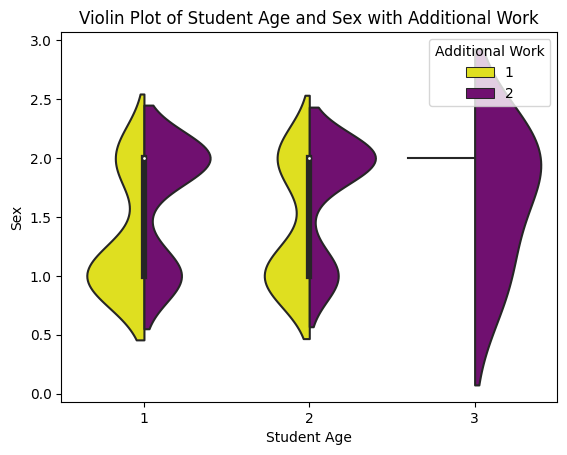

In [ ]:
sns.violinplot(x='Student Age', y='Sex', hue='Additional Work', split=True, palette = ['yellow','purple'], data=df)
plt.title('Violin Plot of Student Age and Sex with Additional Work')

Text(0.5, 1.0, 'Violin Plot of Additional Work and Weekly study hours with Regular Artistic or Sports activity')

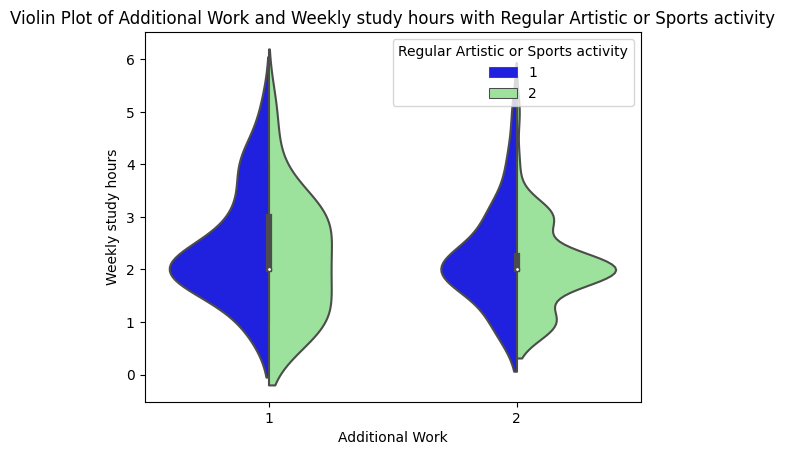

In [ ]:
sns.violinplot(x='Additional Work', y='Weekly study hours', hue='Regular Artistic or Sports activity', split=True, palette = ['Blue','lightgreen'], data=df)
plt.title('Violin Plot of Additional Work and Weekly study hours with Regular Artistic or Sports activity')

Text(0.5, 1.0, "Violin Plot of Mother's education and Father's education with Atttendance to the seminars related to the department")

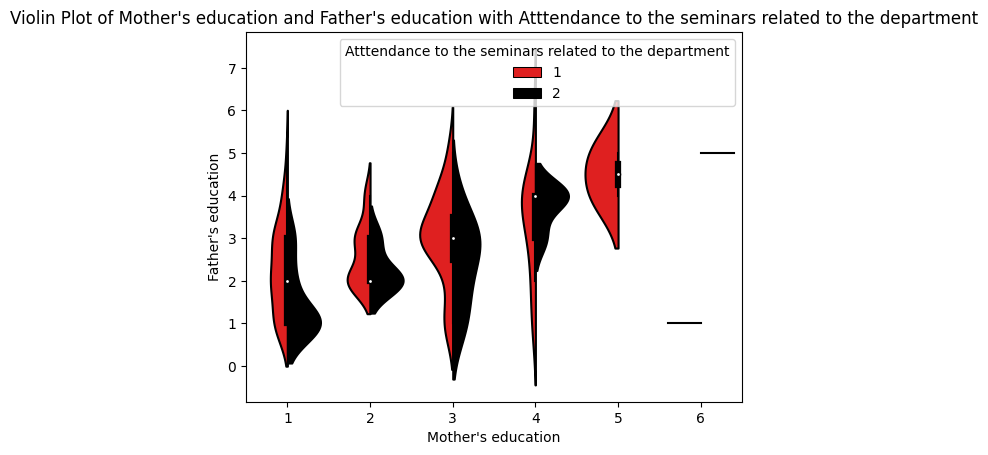

In [ ]:
sns.violinplot(x='Mother\'s education', y='Father\'s education', hue='Atttendance to the seminars related to the department', split=True, palette = ['Red','Black'], data=df)
plt.title('Violin Plot of Mother\'s education and Father\'s education with Atttendance to the seminars related to the department')

Text(0.5, 1.0, 'Violin Plot of Preparation to midterm exams1 and Preparation to midterm exams 2 with Attendance to classes')

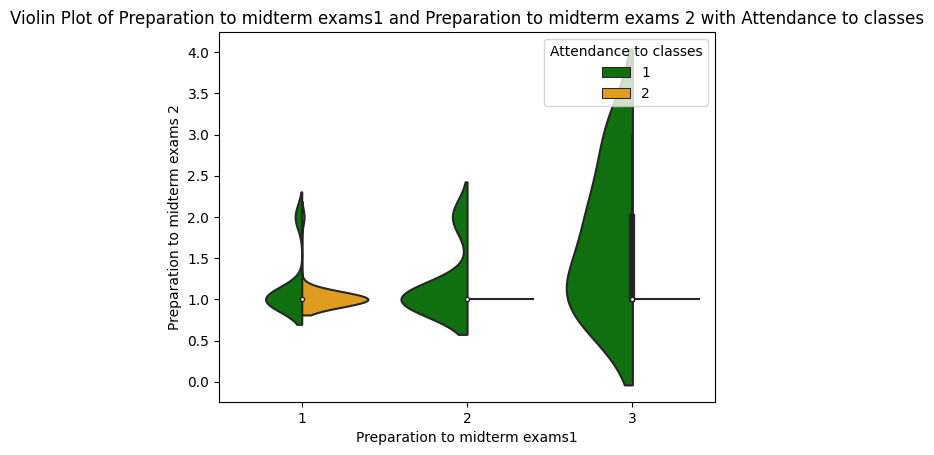

In [ ]:
sns.violinplot(x='Preparation to midterm exams1', y='Preparation to midterm exams 2', hue='Attendance to classes', split=True,palette = ['green','orange'], data=df)
plt.title('Violin Plot of Preparation to midterm exams1 and Preparation to midterm exams 2 with Attendance to classes')

Text(0.5, 1.0, 'Violin Plot of Taking notes in classes and Listening in classes with Attendance to classes')

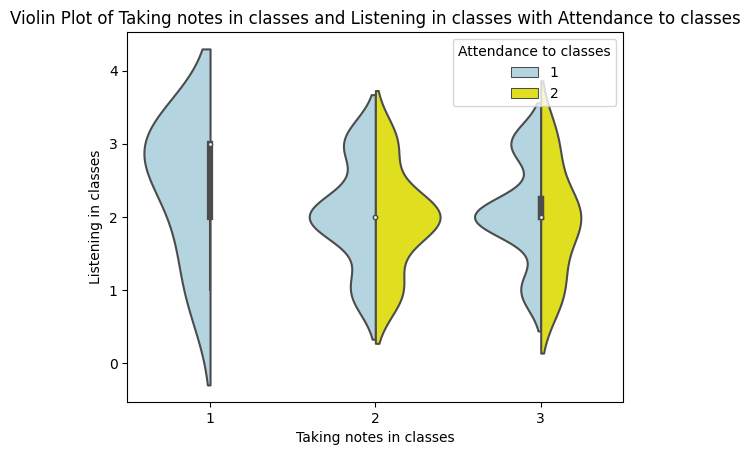

In [ ]:
sns.violinplot(x='Taking notes in classes', y='Listening in classes', hue='Attendance to classes', split=True,palette = ['lightblue','yellow'], data=df)
plt.title('Violin Plot of Taking notes in classes and Listening in classes with Attendance to classes')

#HISTOGRAMS

0.39037211618107137

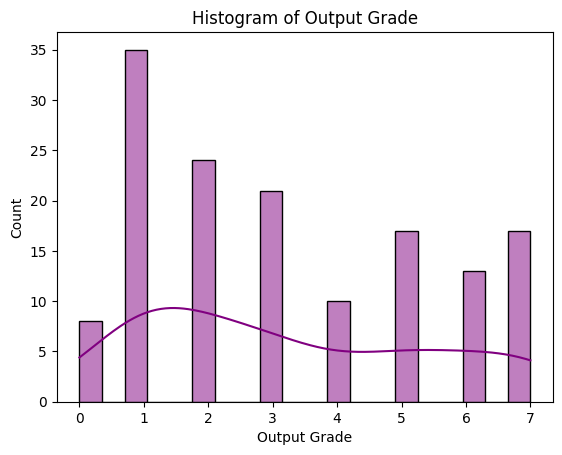

In [ ]:
sns.histplot(df['Output Grade'], kde=True, bins=20, color='Purple')
plt.title('Histogram of Output Grade')
skewness_values = df['Output Grade'].skew()
skewness_values

0.44348649287174396

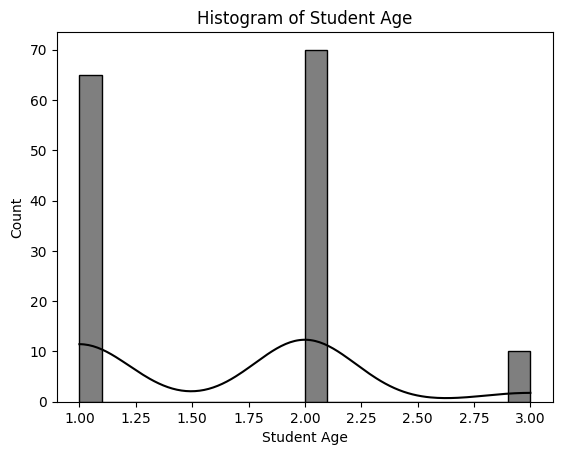

In [ ]:
sns.histplot(df['Student Age'], kde=True, bins=20, color='black')
plt.title('Histogram of Student Age')
skewness_values = df['Student Age'].skew()
skewness_values

-0.4125281455595145

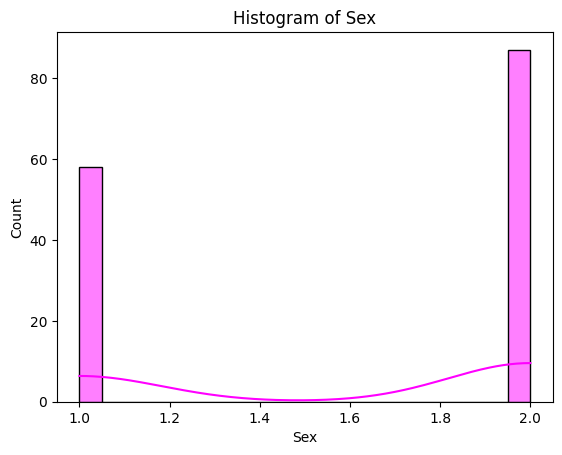

In [ ]:
sns.histplot(df['Sex'], kde=True, bins=20, color='magenta')
plt.title('Histogram of Sex')
skewness_values = df['Sex'].skew()
skewness_values

0.9039003913838175

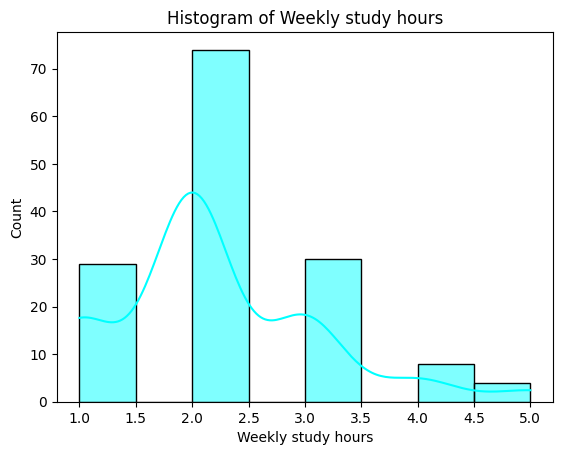

In [ ]:
sns.histplot(df['Weekly study hours'], kde=True, bins=8, color='cyan')
plt.title('Histogram of Weekly study hours')
skewness_values = df['Weekly study hours'].skew()
skewness_values

1.2214061666527163

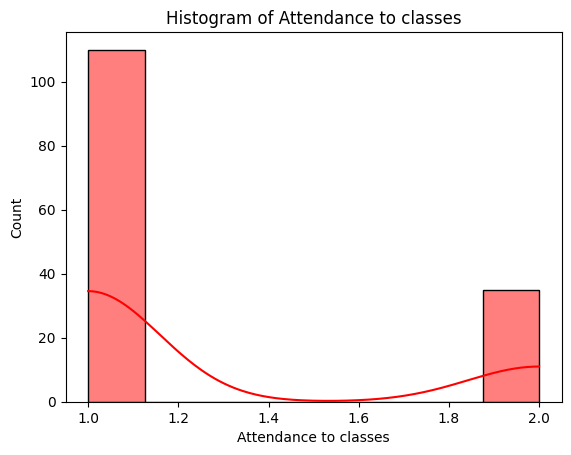

In [ ]:
sns.histplot(df['Attendance to classes'], kde=True, bins=8, color='red')
plt.title('Histogram of Attendance to classes')
skewness_values = df['Attendance to classes'].skew()
skewness_values

#PIE CHARTS

<Axes: title={'center': 'Distribution of Student Age'}, ylabel='Student Age'>

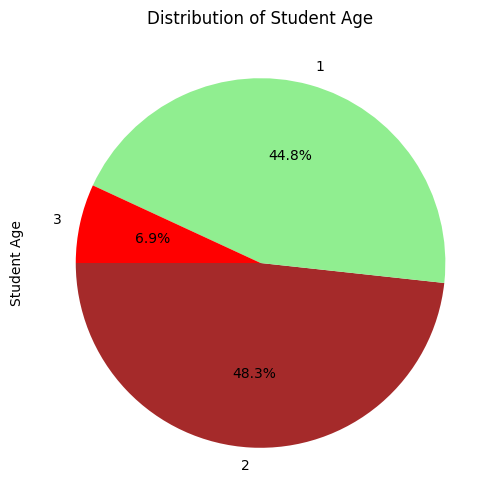

In [ ]:
colors = ['brown','lightgreen','red']
df['Student Age'].value_counts().plot.pie(autopct='%1.1f%%', startangle=180, figsize=(6, 6), title='Distribution of Student Age',colors=colors)

<Axes: title={'center': 'Distribution of Output Grade'}, ylabel='Output Grade'>

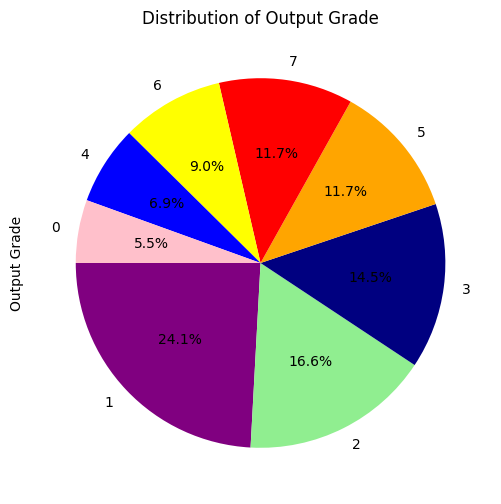

In [ ]:
colors = ['purple','lightgreen','navy','orange','red','yellow','blue','pink']
df['Output Grade'].value_counts().plot.pie(autopct='%1.1f%%', startangle=180, figsize=(6, 6), title='Distribution of Output Grade',colors=colors)

<Axes: title={'center': 'Distribution of Scholarship type'}, ylabel='Scholarship type'>

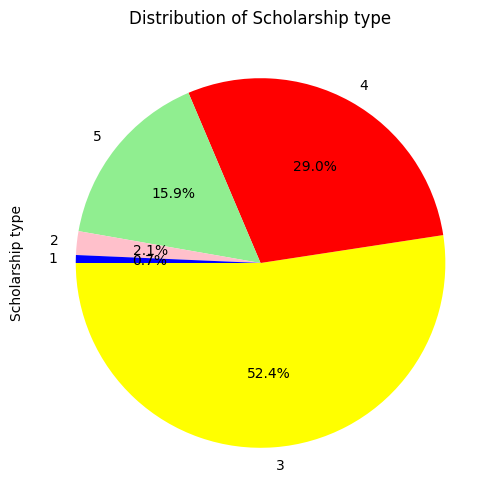

In [ ]:
colors = ['yellow','red','lightgreen','pink','blue']
df['Scholarship type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=180, figsize=(6, 6), title='Distribution of Scholarship type',colors=colors)

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

,Student Age,Sex,Graduated HighSchool Type,Scholarship type,Additional Work,Regular Artistic or Sports activity,Have a partner?,Total Salary if available,Transportation to the University,Accommodation type in Cyprus,...,Preparation to midterm exams1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),Course ID,Output Grade
Student Age,1.000000,0.138233,0.294426,-0.316506,-0.181019,0.138233,0.042572,0.127853,0.001472,-0.199257,...,-0.044462,0.030595,-0.181121,0.235576,-0.100812,0.228884,0.172597,0.121441,-0.304994,-0.095251
Sex,0.138233,1.000000,0.126218,-0.206876,0.190476,0.224138,-0.125471,-0.022154,-0.013313,-0.154957,...,-0.032164,-0.013833,0.065013,-0.184238,0.065449,0.223095,0.241033,0.292842,-0.430704,0.335533
Graduated HighSchool Type,0.294426,0.126218,1.000000,-0.086965,-0.155331,0.073627,0.016557,-0.126440,0.023944,-0.018990,...,-0.027258,-0.053034,0.053969,0.123405,-0.082461,0.055107,0.019802,0.053497,-0.118761,0.104821
Scholarship type,-0.316506,-0.206876,-0.086965,1.000000,0.055351,-0.154281,0.120346,-0.119024,0.028288,0.036543,...,0.027357,0.005529,0.164447,0.018147,0.147922,-0.095411,0.236460,0.243517,0.317563,0.023963
Additional Work,-0.181019,0.190476,-0.155331,0.055351,1.000000,0.220238,0.100010,-0.118284,0.102223,-0.152641,...,-0.153273,-0.246770,-0.033757,-0.158217,0.078973,0.027762,0.034666,0.007706,-0.114794,0.167445
Regular Artistic or Sports activity,0.138233,0.224138,0.073627,-0.154281,0.220238,1.000000,-0.011406,0.060922,0.026626,-0.227030,...,-0.124062,-0.117580,-0.035007,0.004187,-0.028050,0.135949,0.002171,-0.092476,-0.326711,-0.062993
Have a partner?,0.042572,-0.125471,0.016557,0.120346,0.100010,-0.011406,1.000000,-0.078556,0.037811,-0.168201,...,-0.191197,-0.031005,0.005818,-0.054734,-0.000480,-0.082664,-0.058479,-0.012658,0.068769,-0.051778
Total Salary if available,0.127853,-0.022154,-0.126440,-0.119024,-0.118284,0.060922,-0.078556,1.000000,-0.015926,0.030177,...,0.213079,0.048955,-0.235900,-0.050648,-0.031225,-0.037184,-0.100950,-0.058644,-0.123024,-0.166352
Transportation to the University,0.001472,-0.013313,0.023944,0.028288,0.102223,0.026626,0.037811,-0.015926,1.000000,0.327283,...,-0.015048,-0.094471,0.022769,-0.019064,-0.134057,-0.158432,-0.036078,0.005909,0.114839,-0.156289
Accommodation type in Cyprus,-0.199257,-0.154957,-0.018990,0.036543,-0.152641,-0.227030,-0.168201,0.030177,0.327283,1.000000,...,0.132236,0.009870,0.066609,0.146396,-0.024462,-0.136949,-0.082775,-0.007332,0.271997,0.023683


In [ ]:
rounded_correlation_matrix = correlation_matrix.round(2)
rounded_correlation_matrix

,Student Age,Sex,Graduated HighSchool Type,Scholarship type,Additional Work,Regular Artistic or Sports activity,Have a partner?,Total Salary if available,Transportation to the University,Accommodation type in Cyprus,...,Preparation to midterm exams1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),Course ID,Output Grade
Student Age,1.00,0.14,0.29,-0.32,-0.18,0.14,0.04,0.13,0.00,-0.20,...,-0.04,0.03,-0.18,0.24,-0.10,0.23,0.17,0.12,-0.30,-0.10
Sex,0.14,1.00,0.13,-0.21,0.19,0.22,-0.13,-0.02,-0.01,-0.15,...,-0.03,-0.01,0.07,-0.18,0.07,0.22,0.24,0.29,-0.43,0.34
Graduated HighSchool Type,0.29,0.13,1.00,-0.09,-0.16,0.07,0.02,-0.13,0.02,-0.02,...,-0.03,-0.05,0.05,0.12,-0.08,0.06,0.02,0.05,-0.12,0.10
Scholarship type,-0.32,-0.21,-0.09,1.00,0.06,-0.15,0.12,-0.12,0.03,0.04,...,0.03,0.01,0.16,0.02,0.15,-0.10,0.24,0.24,0.32,0.02
Additional Work,-0.18,0.19,-0.16,0.06,1.00,0.22,0.10,-0.12,0.10,-0.15,...,-0.15,-0.25,-0.03,-0.16,0.08,0.03,0.03,0.01,-0.11,0.17
Regular Artistic or Sports activity,0.14,0.22,0.07,-0.15,0.22,1.00,-0.01,0.06,0.03,-0.23,...,-0.12,-0.12,-0.04,0.00,-0.03,0.14,0.00,-0.09,-0.33,-0.06
Have a partner?,0.04,-0.13,0.02,0.12,0.10,-0.01,1.00,-0.08,0.04,-0.17,...,-0.19,-0.03,0.01,-0.05,-0.00,-0.08,-0.06,-0.01,0.07,-0.05
Total Salary if available,0.13,-0.02,-0.13,-0.12,-0.12,0.06,-0.08,1.00,-0.02,0.03,...,0.21,0.05,-0.24,-0.05,-0.03,-0.04,-0.10,-0.06,-0.12,-0.17
Transportation to the University,0.00,-0.01,0.02,0.03,0.10,0.03,0.04,-0.02,1.00,0.33,...,-0.02,-0.09,0.02,-0.02,-0.13,-0.16,-0.04,0.01,0.11,-0.16
Accommodation type in Cyprus,-0.20,-0.15,-0.02,0.04,-0.15,-0.23,-0.17,0.03,0.33,1.00,...,0.13,0.01,0.07,0.15,-0.02,-0.14,-0.08,-0.01,0.27,0.02


<Axes: >

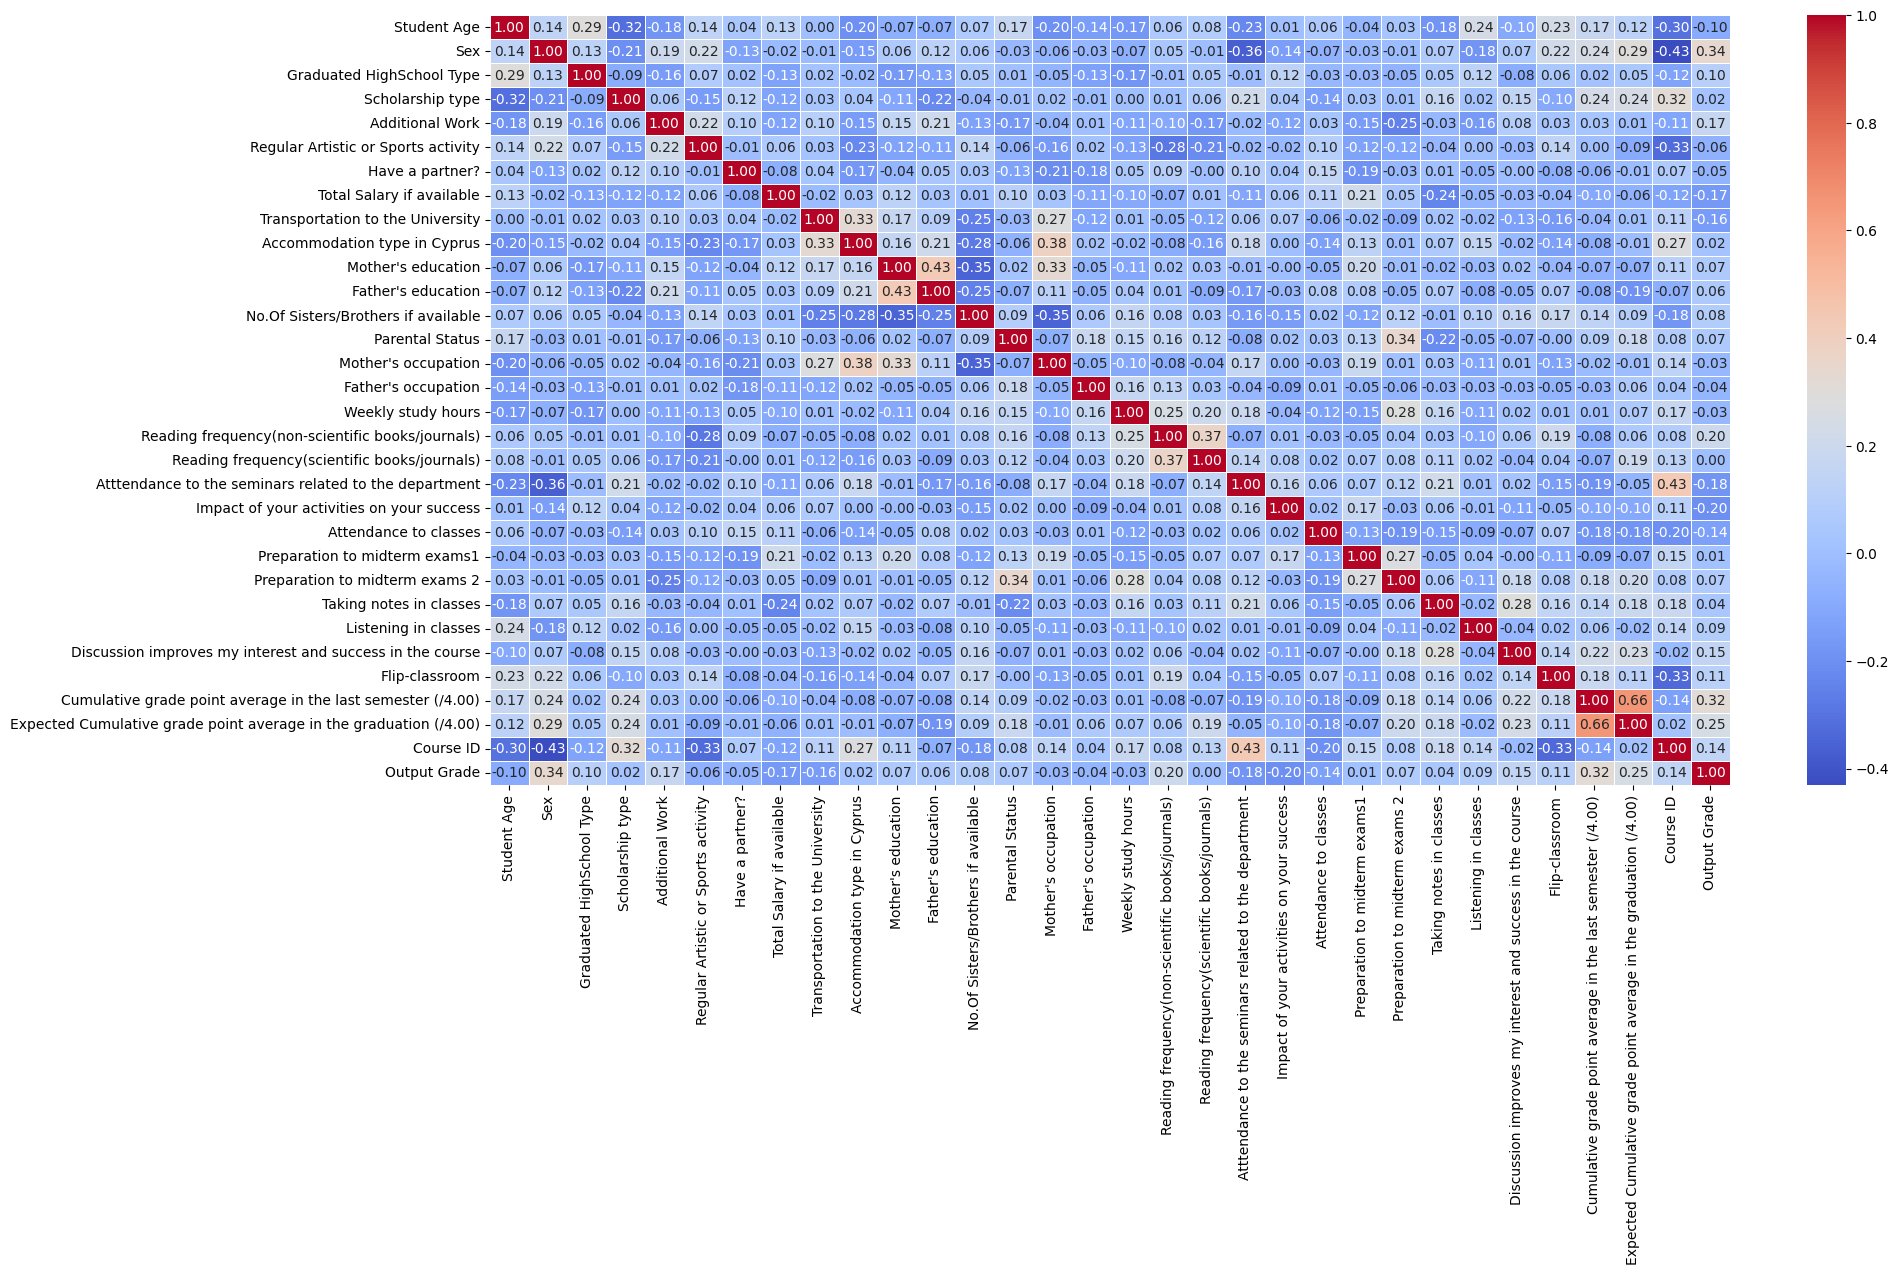

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# FEATURE SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

In [ ]:
X=df.drop(['Sex','STUDENT ID','Course ID','Transportation to the University','Accommodation type in Cyprus','No.Of Sisters/Brothers if available','Have a partner?'],axis=1)
y=df['Output Grade']

In [ ]:
X=scalar.fit_transform(X)
print(X)

[[0.5        1.         0.5        ... 0.         0.         0.14285714]
 [0.5        1.         0.5        ... 0.25       0.66666667 0.14285714]
 [0.5        0.5        0.5        ... 0.25       0.33333333 0.14285714]
 ...
 [0.         0.         0.75       ... 0.75       0.66666667 0.14285714]
 [0.5        0.5        0.75       ... 1.         0.66666667 0.57142857]
 [0.         0.         1.         ... 1.         1.         0.42857143]]


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
scalar=MinMaxScaler()

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [15, 20, 25],
    'max_depth': [None , 5, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
rfc=RandomForestClassifier()
rf_Grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [ ]:
print(rf_Grid)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [15, 20, 25]},
             verbose=2)


In [ ]:
rf_Grid.fit(X,y)
rf_Grid.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 25}

In [ ]:
rf=RandomForestClassifier(min_samples_leaf=1,min_samples_split=6,n_estimators=25)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
y_pred

array([5, 5, 1, 3, 1, 1, 2, 6, 7, 2, 1, 3, 1, 5, 5, 2, 2, 3, 6, 7, 5, 1,
       1, 5, 3, 2, 5, 6, 2])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      1.00      0.60         3
           2       0.67      1.00      0.80         4
           3       1.00      0.67      0.80         6
           4       0.00      0.00      0.00         3
           5       0.43      1.00      0.60         3
           6       0.67      0.50      0.57         4
           7       1.00      1.00      1.00         2

    accuracy                           0.62        29
   macro avg       0.52      0.65      0.55        29
weighted avg       0.55      0.62      0.55        29



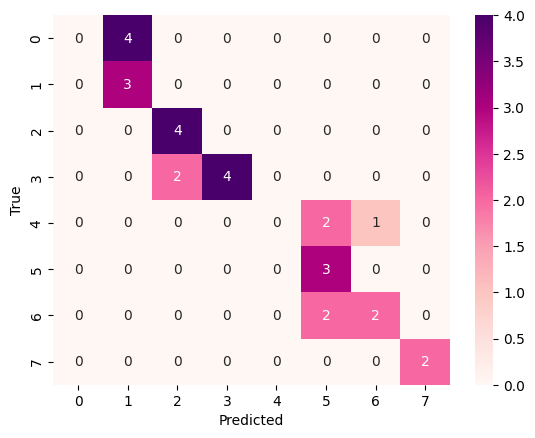

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr=LogisticRegression()

In [ ]:
param_grid = {
    'penalty': ['l1','l2'],
    'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
    'max_iter': [100,150,200],
    'multi_class' :['auto', 'ovr', 'multinomial'],
    'class_weight' :['dict','balanced']
}

In [ ]:
lgr_grid=GridSearchCV(estimator=lgr,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [ ]:
lgr_grid.fit(X,y)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'class_weight': ['dict', 'balanced'],
                         'max_iter': [100, 150, 200],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky']},
             verbose=2)

In [ ]:
lgr_grid.best_params_

{'class_weight': 'balanced',
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
log=LogisticRegression(class_weight='balanced',max_iter=100,multi_class='auto',penalty='l1',solver='liblinear')

In [ ]:
log.fit(X,y)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg_model = LogisticRegression(random_state=42, max_iter=100)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = logreg_model.predict(X_test)
y_pred

array([3, 7, 1, 1, 2, 2, 2, 5, 3, 1, 1, 3, 1, 1, 3, 5, 3, 3, 7, 7, 5, 1,
       2, 3, 3, 2, 5, 7, 2])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.21
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.14      0.33      0.20         3
           2       0.17      0.25      0.20         4
           3       0.38      0.50      0.43         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4
           7       0.25      0.50      0.33         2

    accuracy                           0.21        29
   macro avg       0.12      0.20      0.15        29
weighted avg       0.13      0.21      0.16        29



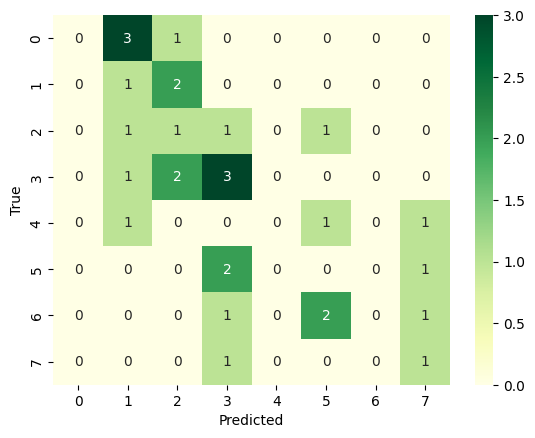

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
svm_Grid=GridSearchCV(svm.SVC(),{'C' :[1,10,25],'kernel' :['linear', 'poly', 'rbf'],'degree' :[1,2,3],'gamma' :['scale','auto']},cv=5,return_train_score=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
svm_classifier = SVC()


In [ ]:
svm_classifier.fit(X_train, y_train)


SVC()

In [ ]:
y_pred = svm_classifier.predict(X_test)
y_pred

array([3, 7, 1, 1, 1, 1, 1, 5, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 7, 7, 3, 1,
       1, 3, 3, 1, 5, 7, 1])

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.17
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.18      1.00      0.30         3
           2       0.00      0.00      0.00         4
           3       0.17      0.17      0.17         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4
           7       0.25      0.50      0.33         2

    accuracy                           0.17        29
   macro avg       0.07      0.21      0.10        29
weighted avg       0.07      0.17      0.09        29



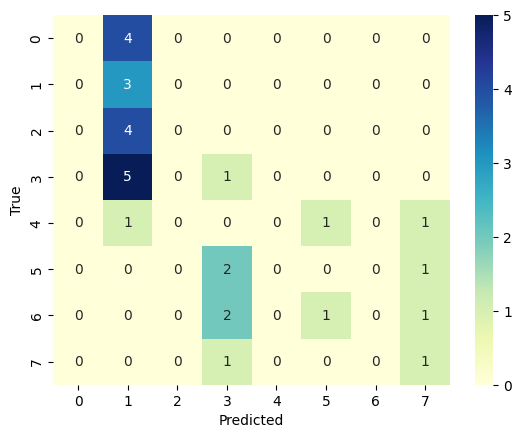

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()